In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import dask.dataframe as dd
import graphviz

In [2]:
date_cols = ['weight_date', 'date', 'event_date', 'lab_date',
               'height_date', 'cpt_date', 'measure_date', 'survey_date']
cols_to_use = ['patient_id', 'weight', 'pregnancy_ind', 'file_type', 'value',
              'sex', 'age', 'bmi'] + date_cols

In [3]:
use_dask = True

if use_dask:
    raw_data = dd.read_csv('../data/raw/all_measure_long_v2.csv', 
                       encoding='latin-1',
                       low_memory=False,
                       parse_dates=date_cols,
                       usecols=cols_to_use)
else:
    raw_data = pd.read_csv('../data/raw/all_measure_long_v2.csv', encoding='latin-1')
    
raw_data.head()

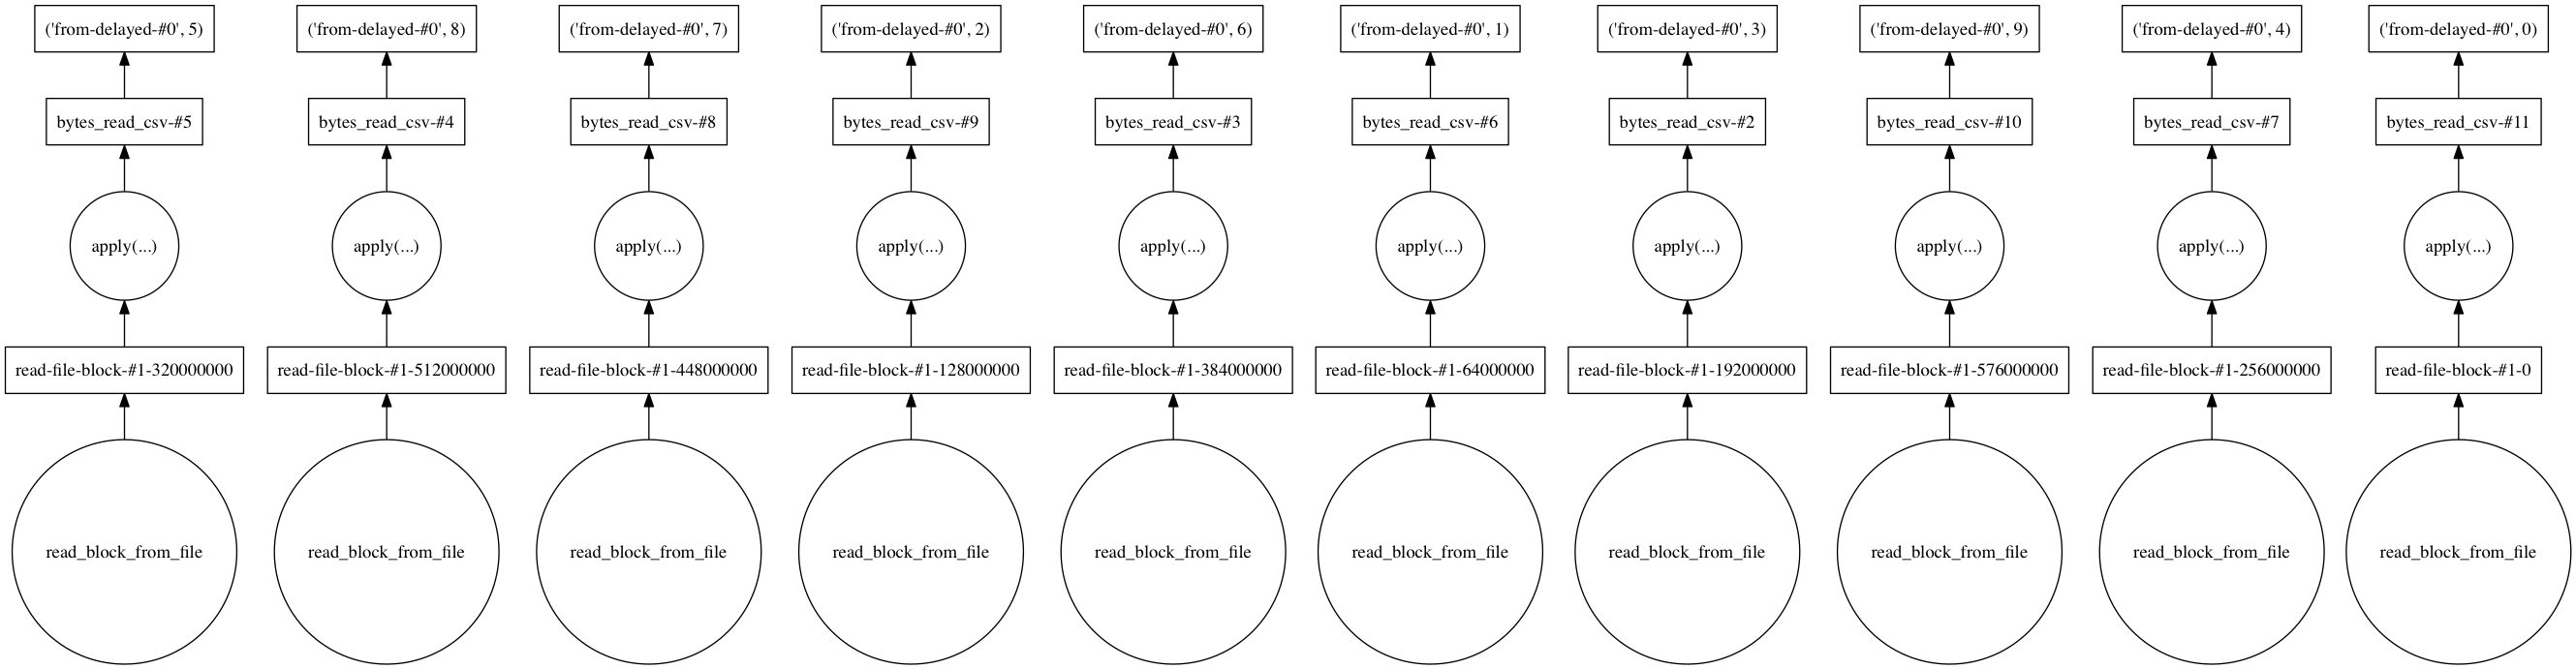

In [11]:
raw_data.visualize()

In [9]:
raw_data.patient_id.unique().shape # (19557,)

(19457,)

In [10]:
raw_data.patient_id.str.lstrip('0').unique().shape # (15436,)

(11770,)

In [11]:
raw_data.patient_id_vandy.str.lstrip('0').unique().shape # (7393,)

(5313,)

In [8]:
raw_data.patient_id_jackson.str.lstrip('0').unique().shape # (6005,)

(5015,)

In [14]:
raw_data.greenwayid.str.lstrip('0').unique().shape # (1453,)

(1453,)

In [15]:
(raw_data.greenwayid.unique().shape[0] +
 raw_data.patient_id_jackson.unique().shape[0] +
 raw_data.patient_id_vandy.unique().shape[0]) # 14851

18947

In [5]:
column_names = raw_data.columns.tolist()

In [14]:
raw_data.columns[raw_data.columns.str.endswith('id')]

Index(['patient_id', 'site_id', 'jacksonid', 'participantid', 'Bid', 'Aid',
       'study_id', 'greenwayid'],
      dtype='object')

In [5]:
data_by_patient = raw_data.groupby('patient_id')

In [11]:
dd.compute(raw_data.weight.min(), raw_data.weight.max())

ValueError: Error parsing datetime string "nan" at position 0

Traceback
---------
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/dask/async.py", line 263, in execute_task
    result = _execute_task(task, data)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/dask/async.py", line 245, in _execute_task
    return func(*args2)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/dask/compatibility.py", line 47, in apply
    return func(*args, **kwargs)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/dask/dataframe/csv.py", line 49, in bytes_read_csv
    coerce_dtypes(df, dtypes)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/dask/dataframe/csv.py", line 74, in coerce_dtypes
    df[c] = df[c].astype(dtypes[c])
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/pandas/core/generic.py", line 3054, in astype
    raise_on_error=raise_on_error, **kwargs)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/pandas/core/internals.py", line 3168, in astype
    return self.apply('astype', dtype=dtype, **kwargs)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/pandas/core/internals.py", line 3035, in apply
    applied = getattr(b, f)(**kwargs)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/pandas/core/internals.py", line 462, in astype
    values=values, **kwargs)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/pandas/core/internals.py", line 505, in _astype
    values = _astype_nansafe(values.ravel(), dtype, copy=True)
  File "/Users/fonnescj/anaconda3/envs/dev/lib/python3.5/site-packages/pandas/types/cast.py", line 537, in _astype_nansafe
    return arr.astype(dtype)
